In [ ]:
#迴歸: 單純線性回歸; 多元線性回歸
# 邏輯斯回歸 (二元分類)
# KNN 最近鄰居 分類
# 決策樹 分類
# 共享單車, 房屋價格, 葡萄酒

In [ ]:
# 類神經網路
# 辨識手寫數字
# 特徵 feature : 使用於模型資料
# 數字, 純量 (scalar), 向量 (vector), 矩陣, 陣列
x = 9487 #scalar -> 0 階 tensor
y = [9, 4, 8, 7] # vector 1 階 tensor
z = [[9, 4],[8, 7]] # 2 階 tensor
#tensor 張量

In [2]:
import numpy as np
import matplotlib.pyplot as plt
x = np.array([[9], [4], [8], [7]])
x

array([[9],
       [4],
       [8],
       [7]])

In [3]:
x.shape #每個資料都只有值, 所以是 純量 的概念
#3分鐘練習, 6:56

(4, 1)

In [4]:
#向量
y = np.array([[9, 4, 8, 7], [8, 7, 4, 5]])
y

array([[9, 4, 8, 7],
       [8, 7, 4, 5]])

In [5]:
y.shape

(2, 4)

In [6]:
a = y[0]
b = y[1]
a

array([9, 4, 8, 7])

In [7]:
a.reshape(2, 2)
#3分鐘練習, 7:03

array([[9, 4],
       [8, 7]])

In [13]:
#分類類型資料進行編碼 One-Hot Encoding
from tensorflow.keras.utils import to_categorical
x = [0,1, 2, 3,4, 5]
x_1 = to_categorical(x, 6)
x_1
#3分鐘練習,7:10

array([[1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 1.]], dtype=float32)

In [ ]:
# 類神經網路 -> 深度學習
# 需要大量資料, 一個類別 1000 筆

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.datasets import mnist
# 7:20 完成

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
x_train.shape
#3分鐘完恆, 7:26

(60000, 28, 28)

0

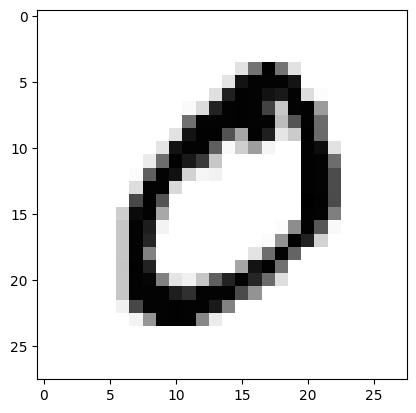

In [8]:
x_train[1]
plt.imshow(x_train[1], cmap='Greys')
y_train[1]
#包含第一節課的休息, 7:43 繼續

In [9]:
x_train = x_train.reshape(60000, 784)/255 #除255 可以讓值改變成 0 到 1 之間
x_test = x_test.reshape(10000, 784)/255
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)
y_train.shape

(60000, 10)

In [10]:
y_train[0]
#3分鐘練習, 7:52

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [11]:
model = Sequential()
model.add(Dense(100, input_dim=784, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.compile(loss='mse', optimizer=SGD(learning_rate=0.087), metrics=['accuracy'])
model.summary()
#5分鐘完成, 8:05

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               78500     
                                                                 
 dense_1 (Dense)             (None, 100)               10100     
                                                                 
 dense_2 (Dense)             (None, 100)               10100     
                                                                 
 dense_3 (Dense)             (None, 10)                1010      
                                                                 
Total params: 99710 (389.49 KB)
Trainable params: 99710 (389.49 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [12]:
model.fit(x_train, y_train, batch_size=100, epochs=20)
#5分鐘訓練完成, 8:13

Epoch 1/20
600/600 [==============================] - 4s 3ms/step - loss: 0.0872 - accuracy: 0.2671
Epoch 2/20
600/600 [==============================] - 2s 3ms/step - loss: 0.0665 - accuracy: 0.5798
Epoch 3/20
600/600 [==============================] - 2s 3ms/step - loss: 0.0360 - accuracy: 0.7873
Epoch 4/20
600/600 [==============================] - 2s 3ms/step - loss: 0.0236 - accuracy: 0.8606
Epoch 5/20
600/600 [==============================] - 2s 3ms/step - loss: 0.0190 - accuracy: 0.8829
Epoch 6/20
600/600 [==============================] - 2s 3ms/step - loss: 0.0168 - accuracy: 0.8938
Epoch 7/20
600/600 [==============================] - 2s 3ms/step - loss: 0.0154 - accuracy: 0.9022
Epoch 8/20
600/600 [==============================] - 2s 3ms/step - loss: 0.0144 - accuracy: 0.9085
Epoch 9/20
600/600 [==============================] - 2s 3ms/step - loss: 0.0136 - accuracy: 0.9131
Epoch 10/20
600/600 [==============================] - 2s 3ms/step - loss: 0.0130 - accuracy: 0.9164

In [22]:
x_test[0].shape
inp = x_test[0].reshape(1, 784)
model.predict(inp)
y_predict = np.argmax(model.predict(inp), axis=-1)
y_predict
#3分鐘練習, 8:22

1/1 [==============================] - 0s 16ms/step


array([7])

In [27]:
y_predict = np.argmax(model.predict(x_test), axis=-1)

313/313 [==============================] - 1s 2ms/step


類神經網路預測的結果是:  2


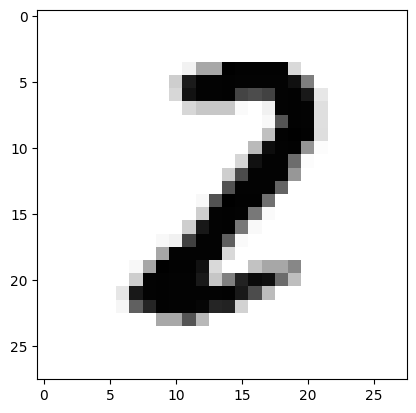

In [31]:

n = 1002
print('類神經網路預測的結果是: ', y_predict[n])
plt.imshow(x_test[n].reshape(28, 28), cmap='Greys')
plt.show()
#3分鐘練習, 8:32
#第二節休息至 8:45

In [38]:
from ipywidgets import interact_manual
def test(測試編號):
  plt.imshow(x_test[測試編號].reshape(28, 28), cmap='Greys')
  print('類神經網路判斷為: ', y_predict[測試編號])


interactive(children=(IntSlider(value=4999, description='測試編號', max=9999), Button(description='Run Interact', …

<function __main__.test(測試編號)>

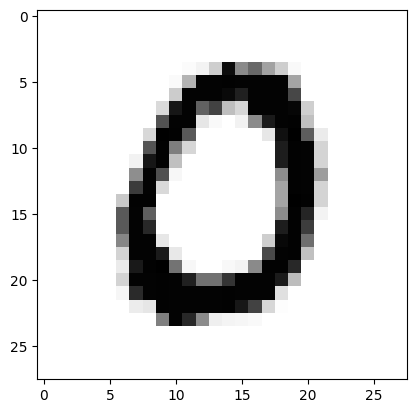

In [42]:
interact_manual(test, 測試編號=(0, 9999))
#5分鐘練習, 9:00

In [43]:
score = model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0096 - accuracy: 0.9370


In [46]:
print('loss: ', score[0])
print('正確率: ', score[1])

loss:  0.009619866497814655
正確率:  0.9369999766349792


In [47]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [48]:
%cd '/content/drive/My Drive/Colab Notebooks'

/content/drive/My Drive/Colab Notebooks


In [49]:
model.save('pan__dnn_model')
#5分鐘練習, 9:15

In [52]:
# 讀取自己儲存的 model
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [54]:
%cd '/content/drive/My Drive/Colab Notebooks'

/content/drive/My Drive/Colab Notebooks


In [57]:
from tensorflow.keras.models import load_model
model_new = load_model('pan__dnn_model')

In [60]:

#5分鐘練習, 9:30

In [ ]:
!pip install openai

In [64]:
import openai
reply = opena.ChatCompletion.care(
    model
    mesage
)

ImportError: cannot import name 'TypeAliasType' from 'typing_extensions' (/usr/local/lib/python3.10/dist-packages/typing_extensions.py)